In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 41.4 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
     |████████████████████████████████| 186 kB 70.3 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 321 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *
matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [10]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [12]:
tensor(im3).shape

torch.Size([28, 28])

In [13]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:25, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

In [14]:
threes_tensors = [tensor(Image.open(o)) for o in threes]
sevens_tensors = [tensor(Image.open(o)) for o in sevens]
threes_tensors

[tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254,

In [15]:
len(threes_tensors), len(sevens_tensors)

(6131, 6265)

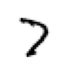

In [16]:
show_image(sevens_tensors[1000])

In [17]:
stacked_sevens = torch.stack(sevens_tensors).float()/255
stacked_threes = torch.stack(threes_tensors).float()/255

In [18]:
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [19]:
xt = tensor(3.).requires_grad_()

In [20]:
def f(x):return x**2

In [21]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [22]:
yt.backward()

In [23]:
xt.grad

tensor(6.)

In [24]:
xt = tensor([3., 4., 5.])

In [25]:
xt.requires_grad_()


tensor([3., 4., 5.], requires_grad=True)

In [26]:
def f(x): return (x**2).sum()
yt = f(xt)

In [27]:
yt

tensor(50., grad_fn=<SumBackward0>)

In [28]:
yt.backward()

In [29]:
xt.grad

tensor([ 6.,  8., 10.])

In [30]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

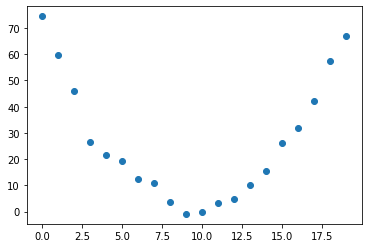

In [31]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 +1

plt.scatter(time, speed)

In [32]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) +c

In [33]:
def mse(preds, targets):return ((preds-targets)**2).mean()

In [34]:
params = torch.randn(3).requires_grad_()

In [35]:
preds = f(time, params)

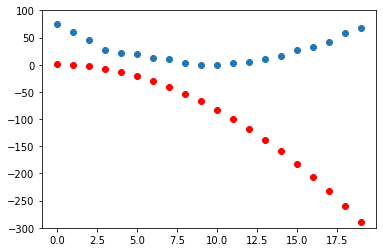

In [36]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time,speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)
show_preds(preds)



In [37]:
loss = mse(preds, speed)

In [38]:
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [39]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [40]:
lr = 1e-5

In [41]:
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [42]:
params.data -= lr*params.grad.data
params.grad = None

In [43]:
preds = f(time , params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

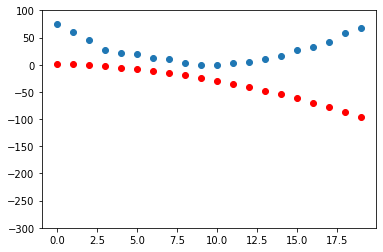

In [44]:
show_preds(preds)

In [45]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= params.grad.data * lr
  params.grad = None
  if prn: print(loss.item())
  return preds

In [46]:
for _ in range(10):apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


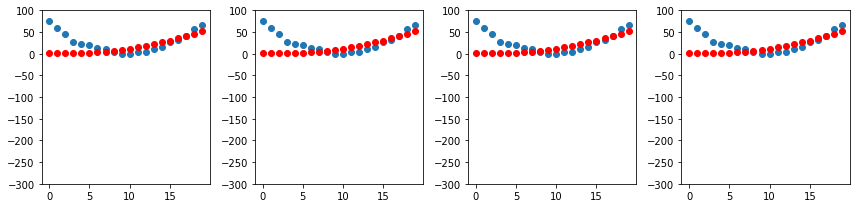

In [47]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [48]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [49]:
train_x.shape

torch.Size([12396, 784])

In [50]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [51]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [52]:
train_x.shape , train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [53]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape , y.shape

(torch.Size([784]), torch.Size([1]))

In [54]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [55]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))
bias = init_params(1)

In [56]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [57]:
train_x.shape

torch.Size([12396, 784])

In [58]:
weights

tensor([[ 1.3123e+00],
        [ 6.8716e-01],
        [-1.0892e+00],
        [-3.5529e-01],
        [-9.1382e-01],
        [-6.5814e-01],
        [ 7.8024e-02],
        [ 5.2581e-01],
        [ 1.1790e+00],
        [-4.3445e-01],
        [-1.3864e+00],
        [-1.2862e+00],
        [-1.4032e+00],
        [ 3.6004e-02],
        [-6.3477e-02],
        [ 6.7561e-01],
        [ 3.6725e-01],
        [ 1.7541e-01],
        [ 1.3852e+00],
        [-4.4585e-01],
        [ 1.4451e+00],
        [ 8.5641e-01],
        [ 2.2181e+00],
        [ 5.2317e-01],
        [ 1.1754e+00],
        [ 5.6117e-01],
        [-4.5275e-01],
        [-7.7178e-01],
        [-1.7219e-01],
        [ 5.2379e-01],
        [ 5.6622e-02],
        [ 4.2630e-01],
        [ 1.9707e-01],
        [-1.1441e+00],
        [ 3.3832e-01],
        [ 1.6992e+00],
        [ 1.0868e-02],
        [-3.3874e-01],
        [-1.3407e+00],
        [-5.8537e-01],
        [-5.6444e-01],
        [ 1.0563e+00],
        [-1.4692e+00],
        [ 1

In [59]:
(train_x@weights).shape

torch.Size([12396, 1])

In [60]:
def linear1(xb): return xb@weights + bias 

preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [61]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [62]:
corrects.float().mean().item()

0.49080348014831543

In [63]:
weights.data[0] *= 1.0001
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [64]:
def mnist_loss(predictions, targets):
  return torch.where(targets==1, 1-predictions, predictions).mean()


In [65]:
help(torch.where)

Help on built-in function where:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    .. note::
        Currently valid scalar and tensor combination are
        1. Scalar of floating dtype and torch.double
        2. Scalar of integral dtype and torch.long
        3. Scalar of complex dtype and torch.complex128
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:x is a scalar) or values selected at indices
                         

In [66]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [67]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [68]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [69]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets==1, 1-predictions, predictions).mean().requires_grad_()


In [70]:
mnist_loss(prds, trgts)

tensor(0.4460, requires_grad=True)

In [71]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [72]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [73]:
dl = DataLoader(ds, batch_size=4, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22]), ('r', 's', 'k', 'w')),
 (tensor([ 8, 14, 20, 15]), ('i', 'o', 'u', 'p')),
 (tensor([ 9, 13, 21, 12]), ('j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5]), ('h', 'z', 'g', 'f')),
 (tensor([11, 23,  1,  3]), ('l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16]), ('a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [74]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [75]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [76]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [77]:
weights = init_params(28*28, 1)
bias = init_params(1)

In [78]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [79]:
valid_dl = DataLoader(valid_dset, batch_size=256)


In [80]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [81]:
preds = linear1(batch)
preds

tensor([-6.0345,  4.8424, -6.8445, -5.8458], grad_fn=<AddBackward0>)

In [82]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7504, grad_fn=<MeanBackward0>)

In [83]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-0.0005), tensor([-0.0035]))

In [84]:
  def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [85]:
weights.grad.zero_()
bias.grad.zero_()
calc_grad(batch, train_y[:4], linear1)

In [86]:

weights.grad.mean() , bias.grad

(tensor(-0.0005), tensor([-0.0035]))

In [87]:
weights.grad.zero_()
bias.grad.zero_()
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean() , bias.grad

(tensor(-0.0005), tensor([-0.0035]))

In [88]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [89]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [90]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [91]:
validate_epoch(linear1)

0.4083

In [92]:
lr =1 
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6028

In [93]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end='=')

0.7983=0.8828=0.9129=0.9297=0.9398=0.9427=0.9455=0.9465=0.9489=0.9508=0.9518=0.9522=0.9542=0.9546=0.9556=0.9556=0.9561=0.9586=0.9591=0.9605=

In [94]:
linear_model = nn.Linear(28*28, 1)

In [95]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [96]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [97]:
opt = BasicOptim(linear_model.parameters(), lr)

In [98]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [99]:
validate_epoch(linear_model)

0.3644

In [100]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [101]:
train_model(linear_model, 20)

0.4932 0.8476 0.8286 0.9106 0.9336 0.9472 0.956 0.9614 0.9653 0.9673 0.9692 0.9717 0.9731 0.9746 0.9761 0.9766 0.9775 0.978 0.9785 0.9785 

In [102]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8784 0.8232 0.9087 0.9326 0.9487 0.9551 0.9619 0.9653 0.9668 0.9692 0.9712 0.9741 0.9751 0.9761 0.9761 0.978 0.978 0.978 0.979 

In [103]:
dls = DataLoaders(dl, valid_dl)

In [104]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, 
              loss_func=mnist_loss, metrics=batch_accuracy)

In [105]:
learn.fit(10, lr=lr)

In [108]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [109]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

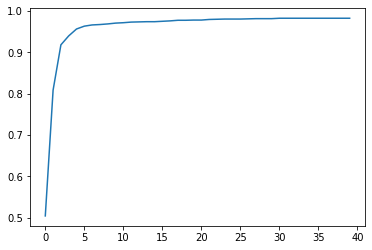

In [110]:
plt.plot(L(learn.recorder.values).itemgot(2))